In [1]:
# A bit of setup
import matplotlib.pyplot as plt
from google.colab import files
from urllib.request import urlopen
import random
import numpy as np
import sympy 
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from keras.layers import LSTM,Dropout,Dense
import sklearn.metrics as sm
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import preprocessing
sc = preprocessing.MinMaxScaler()

In [2]:
file_name = "ev_models.csv"
model_df = pd.read_csv(file_name, sep=",")
model_df = model_df.rename(columns={'Unnamed: 0': 'model_id', 'models': 'model'})
model_df.head()

,model_id,model,battery_size,charge_power,efficiency
0,0,Tesla Model S,72.5,16.5,0.175
1,1,Nissan Leaf e+,56.0,6.6,0.172
2,2,Renault Zoe,41.0,22.0,0.164
3,3,Volkswagen ID.3,45.0,7.2,0.161


In [3]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model_id      4 non-null      int64  
 1   model         4 non-null      object 
 2   battery_size  4 non-null      float64
 3   charge_power  4 non-null      float64
 4   efficiency    4 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 288.0+ bytes


In [4]:
model_df.describe()

,model_id,battery_size,charge_power,efficiency
count,4.000000,4.000000,4.000000,4.000000
mean,1.500000,53.625000,13.075000,0.168000
std,1.290994,14.091221,7.479472,0.006583
min,0.000000,41.000000,6.600000,0.161000
25%,0.750000,44.000000,7.050000,0.163250
50%,1.500000,50.500000,11.850000,0.168000
75%,2.250000,60.125000,17.875000,0.172750
max,3.000000,72.500000,22.000000,0.175000


In [5]:
file_name = "ev_home_locations.csv"
home_location_df = pd.read_csv(file_name, sep=",")
home_location_df = home_location_df.rename(columns={'Unnamed: 0': 'id'})
home_location_df.head()

,id,address,cadaster,latitude,longitude,x,y
0,0,"1, Kvissentali põik, Ülejõe, Tartu linn, Tartu...",79514:037:0033,58.406210,26.706300,6477173.28,658139.66
1,1,"28b/1, Orava, Raadi-Kruusamäe, Tartu linn, Tar...",79512:036:0020,58.389311,26.737114,6475347.92,660042.39
2,2,"16, Alevi, Karlova, Tartu linn, Tartu, Tartu l...",79508:016:0001,58.362547,26.726161,6472365.82,659521.12
3,3,"37, Voolu, Variku, Tartu linn, Tartu, Tartu li...",79509:019:0003,58.346618,26.702650,6470513.21,658227.79
4,4,"12, Ilmatsalu, Veeriku, Tartu linn, Tartu, Tar...",79502:006:0095,58.375785,26.690146,6473716.85,657353.49


In [6]:
home_location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         100 non-null    int64  
 1   address    100 non-null    object 
 2   cadaster   100 non-null    object 
 3   latitude   100 non-null    float64
 4   longitude  100 non-null    float64
 5   x          100 non-null    float64
 6   y          100 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 5.6+ KB


In [7]:
home_location_df.describe()

,id,latitude,longitude,x,y
count,100.000000,100.000000,100.000000,1.000000e+02,100.000000
mean,49.500000,58.369974,26.723026,6.473175e+06,659302.849700
std,29.011492,0.015366,0.028521,1.700388e+03,1677.847126
min,0.000000,58.343825,26.680755,6.470413e+06,656857.930000
25%,24.750000,58.358987,26.700887,6.472002e+06,658064.732500
50%,49.500000,58.370324,26.717327,6.473129e+06,658901.840000
75%,74.250000,58.380684,26.736425,6.474453e+06,660049.050000
max,99.000000,58.406210,26.792473,6.477173e+06,663411.450000


In [8]:
file_name = "ev_long_history.csv"
long_history_df = pd.read_csv(file_name, sep=",")
long_history_df = long_history_df.rename(columns={'Unnamed: 0': 'id'})
long_history_df.head()

,id,time,model,connected,soc,days,cadaster,ev_id
0,0,1,Nissan Leaf e+,True,36.25,1,79514:037:0033,0
1,1,2,Nissan Leaf e+,True,42.85,1,79514:037:0033,0
2,2,3,Nissan Leaf e+,True,49.45,1,79514:037:0033,0
3,3,4,Nissan Leaf e+,True,56.00,1,79514:037:0033,0
4,4,5,Nissan Leaf e+,True,56.00,1,79514:037:0033,0


In [9]:
long_history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72000 entries, 0 to 71999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         72000 non-null  int64  
 1   time       72000 non-null  int64  
 2   model      72000 non-null  object 
 3   connected  72000 non-null  bool   
 4   soc        72000 non-null  float64
 5   days       72000 non-null  int64  
 6   cadaster   72000 non-null  object 
 7   ev_id      72000 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 3.9+ MB


In [10]:
long_history_df.describe()

,id,time,soc,days,ev_id
count,72000.00000,72000.000000,72000.000000,72000.000000,72000.000000
mean,359.50000,12.500000,47.058425,15.500000,49.500000
std,207.84734,6.922235,15.953412,8.655502,28.866271
min,0.00000,1.000000,0.000000,1.000000,0.000000
25%,179.75000,6.750000,39.402184,8.000000,24.750000
50%,359.50000,12.500000,45.000000,15.500000,49.500000
75%,539.25000,18.250000,56.000000,23.000000,74.250000
max,719.00000,24.000000,72.500000,30.000000,99.000000


In [11]:
file_name = "public_chargers_locations.csv"
public_charger_location_df = pd.read_csv(file_name, sep=",")
public_charger_location_df = public_charger_location_df.rename(columns={'Unnamed: 0': 'id'})
public_charger_location_df.head()

,id,address,cadaster,latitude,longitude,x,y
0,0,"78, Tiigi, Kesklinn, Tartu linn, Tartu, Tartu ...",79506:006:0001,58.373603,26.710675,6473552.48,658596.39
1,1,"30, Veski, Kesklinn, Tartu linn, Tartu, Tartu ...",79507:021:0003,58.378190,26.711309,6474073.17,658582.03
2,2,"Heino Elleri nimeline Tartu Muusikakool, 15, L...",79507:019:0002,58.380050,26.717865,6474277.29,658997.44
3,3,"20A, Sepa, Ropka tööstusrajoon, Tartu linn, Ta...",79511:002:0027,58.350656,26.729897,6471029.11,659793.82
4,4,"7, Tamme põik, Tammelinn, Tartu linn, Tartu, T...",79504:053:0019,58.357376,26.695822,6471706.87,657778.20


In [12]:
public_charger_location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         50 non-null     int64  
 1   address    50 non-null     object 
 2   cadaster   50 non-null     object 
 3   latitude   50 non-null     float64
 4   longitude  50 non-null     float64
 5   x          50 non-null     float64
 6   y          50 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.9+ KB


In [13]:
public_charger_location_df.describe()

,id,latitude,longitude,x,y
count,50.00000,50.000000,50.000000,5.000000e+01,50.000000
mean,24.50000,58.369952,26.720251,6.473165e+06,659140.048000
std,14.57738,0.014597,0.028202,1.633935e+03,1639.595133
min,0.00000,58.339484,26.677914,6.469794e+06,656703.310000
25%,12.25000,58.358984,26.697587,6.471941e+06,657877.192500
50%,24.50000,58.372706,26.717046,6.473473e+06,658936.005000
75%,36.75000,58.382243,26.737459,6.474546e+06,660109.225000
max,49.00000,58.398084,26.789107,6.476292e+06,663265.300000


In [17]:
home_location_df["location_type"] = "home"
public_charger_location_df["location_type"] = "public"

location_df = pd.concat([home_location_df, public_charger_location_df])
location_df = location_df.rename(columns={'id': 'loc_id'})
location_df.head()

,loc_id,address,cadaster,latitude,longitude,x,y,location_type
0,0,"1, Kvissentali põik, Ülejõe, Tartu linn, Tartu...",79514:037:0033,58.406210,26.706300,6477173.28,658139.66,home
1,1,"28b/1, Orava, Raadi-Kruusamäe, Tartu linn, Tar...",79512:036:0020,58.389311,26.737114,6475347.92,660042.39,home
2,2,"16, Alevi, Karlova, Tartu linn, Tartu, Tartu l...",79508:016:0001,58.362547,26.726161,6472365.82,659521.12,home
3,3,"37, Voolu, Variku, Tartu linn, Tartu, Tartu li...",79509:019:0003,58.346618,26.702650,6470513.21,658227.79,home
4,4,"12, Ilmatsalu, Veeriku, Tartu linn, Tartu, Tar...",79502:006:0095,58.375785,26.690146,6473716.85,657353.49,home


In [18]:
work_df = pd.merge(left=long_history_df, right=model_df, how='left', left_on="model", right_on="model")

work_df = pd.merge(left=work_df, right=location_df, how='left', left_on='cadaster', right_on='cadaster')


In [19]:
clean_work_df = work_df[["ev_id", "model_id", "days","time", "connected", "soc", "loc_id", "location_type"]]

clean_work_df.head()

,ev_id,model_id,days,time,connected,soc,loc_id,location_type
0,0,1,1,1,True,36.25,0,home
1,0,1,1,2,True,42.85,0,home
2,0,1,1,3,True,49.45,0,home
3,0,1,1,4,True,56.00,0,home
4,0,1,1,5,True,56.00,0,home


In [20]:
clean_work_df["soc_diff_charged"] = np.where(clean_work_df["soc"].diff() > 0, clean_work_df["soc"].diff(), 0)
clean_work_df["soc_diff_used"] = np.where(clean_work_df["soc"].diff() < 0, clean_work_df["soc"].diff(), 0)

#set days 1 = 0, because we don't want to calculate from different model
clean_work_df[(clean_work_df["days"] == 1) & (clean_work_df["time"] == 1)]["soc_diff_charged"] = 0
clean_work_df[(clean_work_df["days"] == 1) & (clean_work_df["time"] == 1)]["soc_diff_used"] = 0

clean_work_df.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,ev_id,model_id,days,time,connected,soc,loc_id,location_type,soc_diff_charged,soc_diff_used
0,0,1,1,1,True,36.250000,0,home,0.00,0.000000
1,0,1,1,2,True,42.850000,0,home,6.60,0.000000
2,0,1,1,3,True,49.450000,0,home,6.60,0.000000
3,0,1,1,4,True,56.000000,0,home,6.55,0.000000
4,0,1,1,5,True,56.000000,0,home,0.00,0.000000
5,0,1,1,6,False,56.000000,0,home,0.00,0.000000
6,0,1,1,7,True,47.480729,22,public,0.00,-8.519271
7,0,1,1,8,False,54.080729,22,public,6.60,0.000000
8,0,1,1,9,False,49.061419,22,public,0.00,-5.019311
9,0,1,1,10,False,48.201419,22,public,0.00,-0.860000


In [21]:
charge_summary_df = clean_work_df[clean_work_df["connected"] == True].groupby(["ev_id", "model_id", "days"])["connected"].agg(["count"])
charge_summary_df = charge_summary_df.reset_index(level=[0,1,2])

#get drive times
tmp = clean_work_df[clean_work_df["connected"] == False].groupby(["ev_id", "model_id", "days"])["connected"].agg(["count"])
tmp = tmp.reset_index(level=[0,1,2])
charge_summary_df = charge_summary_df.rename(columns={'count': 'charged_times'})
charge_summary_df["drive_times"] = tmp['count']

#get charged and used power
tmp = clean_work_df.groupby(["ev_id", "model_id", "days"])[["soc_diff_charged", "soc_diff_used"]].agg(["sum"])
tmp = tmp.reset_index(level=[0,1,2])
charge_summary_df["total_charged"] = tmp["soc_diff_charged"]["sum"]
charge_summary_df["total_used"] = tmp["soc_diff_used"]["sum"]

charge_summary_df.head(10)


,ev_id,model_id,days,charged_times,drive_times,total_charged,total_used
0,0,1,1,13,11,72.550000,-67.618828
1,0,1,2,11,13,68.410241,-78.961995
2,0,1,3,15,9,72.698554,-53.539766
3,0,1,4,16,8,38.877431,-32.665637
4,0,1,5,16,8,22.934849,-24.577437
5,0,1,6,18,6,16.562588,-26.115371
6,0,1,7,15,9,48.538978,-37.343607
7,0,1,8,13,11,26.542054,-46.913451
8,0,1,9,13,11,76.835849,-86.174526
9,0,1,10,17,7,53.733208,-24.023134


In [22]:
table = pd.pivot_table(charge_summary_df, values=['total_charged', 'total_used'], 
                       index=['ev_id'], columns=['days'], aggfunc=np.sum)

table.head(10)

total_charged                        ... total_used                      
days             1          2          3   ...         28         29         30
ev_id                                      ...                                 
0         72.550000  68.410241  72.698554  ... -51.967060 -41.738092 -36.722251
1         57.907141  42.887671  26.594516  ... -30.691861 -54.318868 -71.603226
2         93.025310  34.204521  62.145502  ... -64.478376 -64.610161 -42.472772
3         18.324656  42.481422  30.026862  ... -58.175104 -39.954100 -14.750418
4         59.258662  27.428513  91.045171  ... -40.976176 -50.522947 -58.310685
5         16.097593  35.654237  40.479708  ... -41.367964 -27.184082 -51.645157
6         47.927074  59.386969  14.477130  ... -59.611639 -51.214741 -31.408845
7         69.765676  30.052778  40.400902  ... -53.625429 -22.705993 -66.326362
8         66.481394  78.333163  35.320510  ... -62.831718 -75.776113 -37.861837
9         65.950000  48.160202  33.000000  ... -31.850049 -41.703097 -32.454138

[10 rows x 60 columns]

# Separate the train test and validation test

In [24]:
pd.set_option('display.max_rows', None)
merged_inner = pd.merge(left=clean_work_df, right=model_df, left_on='model_id', right_on='model_id')
merged_inner["soc_diff"] = abs(merged_inner["soc_diff_charged"] +  merged_inner["soc_diff_used"])
merged_inner["distance_traveled"] = abs(merged_inner["soc_diff_used"]) / merged_inner["efficiency"]
merged_inner["connected_val"] = np.where(merged_inner["connected"], 1, 0) 
merged_inner["location_val"] = np.where(merged_inner["location_type"] == "home", 0, 1)
tmp_df = merged_inner[merged_inner["ev_id"] == 0]

train_work_df = tmp_df[: int(np.round(len(tmp_df) * 0.75))]
val_work_df = tmp_df[int(np.round(len(tmp_df) * 0.75)) :]

for i in range(1, 100):
  tmp_df = merged_inner[merged_inner["ev_id"] == i]

  train_work_df = pd.concat([train_work_df, tmp_df[: int(np.round(len(tmp_df) * 0.75))]])
  val_work_df = pd.concat([val_work_df, tmp_df[int(np.round(len(tmp_df) * 0.75)) :]])


print(train_work_df.shape)
print(val_work_df.shape)

(54000, 18)
(18000, 18)


# Recurrent Neural Network


## Looking for pattern

### Distance Traveled

In [25]:
distance_df = merged_inner[["ev_id", "model_id", "days","time", "soc", "connected_val","distance_traveled"]]

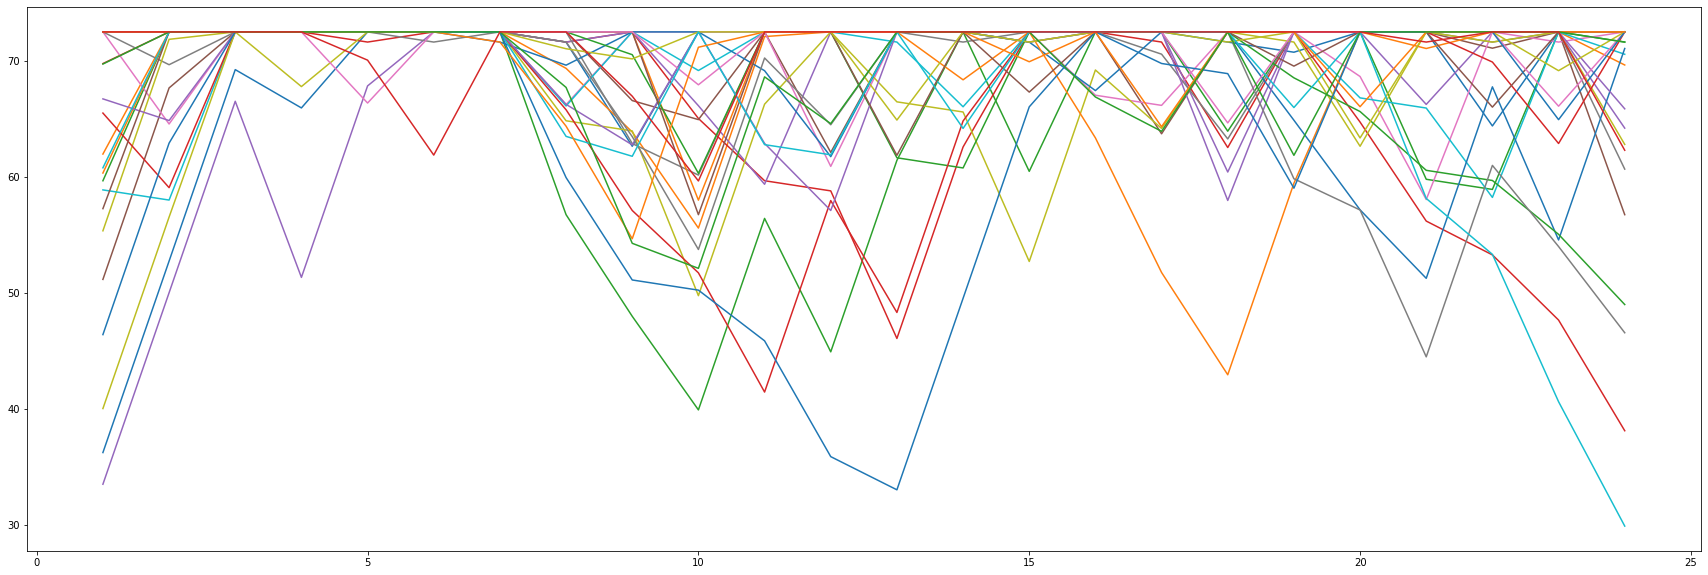

In [28]:
plt.figure(figsize=(30,10))

distances = []

for x in range(1,25):
  tmp = distance_df[ (distance_df["ev_id"] == 2) & (distance_df["days"] == x)][["time","distance_traveled"]]
  plt.plot(tmp["time"], tmp["distance_traveled"])



In [30]:
#ev_1_df = distance_df[ (distance_df["ev_id"] == 0)]
ev_1_df = distance_df

table = pd.pivot_table(ev_1_df, values=['distance_traveled'], 
                       index=['ev_id','model_id', 'days'], columns=['time'], aggfunc=np.sum)
table.head(24)

distance_traveled             ...                      
time                               1          2   ...         23         24
ev_id model_id days                               ...                      
0     1        1             0.000000   0.000000  ...  52.359143   0.000000
               2             5.000000  68.344749  ...  17.588749  50.281447
               3             5.000000   0.000000  ...   0.000000  14.475948
               4             0.000000   0.000000  ...   0.000000   0.000000
               5             0.000000   0.000000  ...  47.922023   0.000000
               6             0.000000   0.000000  ...   0.000000   5.000000
               7            12.186669  73.075403  ...   0.000000   0.000000
               8             5.000000   0.000000  ...   0.000000  61.588284
               9            29.856201   0.000000  ...  82.207650  59.744368
               10            0.000000   0.000000  ...   0.000000   0.000000
               11            0.000000   0.000000  ...  38.957599   0.000000
               12            8.022469   0.000000  ...   0.000000   0.000000
               13           57.597000   0.000000  ...  36.384895  90.000000
               14            0.000000  50.017568  ...  60.809283   0.000000
               15            0.000000   0.000000  ...  85.020965   0.000000
               16            0.000000   0.000000  ...  44.254845   0.000000
               17            5.000000   0.000000  ...   0.000000   0.000000
               18            0.000000   0.000000  ...   0.000000   0.000000
               19            0.000000   0.000000  ...   0.000000   0.000000
               20            0.000000  31.793138  ...  27.973892  18.994706
               21            0.000000   0.000000  ...   8.911854   0.000000
               22            5.000000   0.000000  ...  20.788655   0.000000
               23            0.000000   0.000000  ...   5.000000  43.371233
               24            0.000000   0.000000  ...  27.401855   5.000000

[24 rows x 24 columns]

### SOC

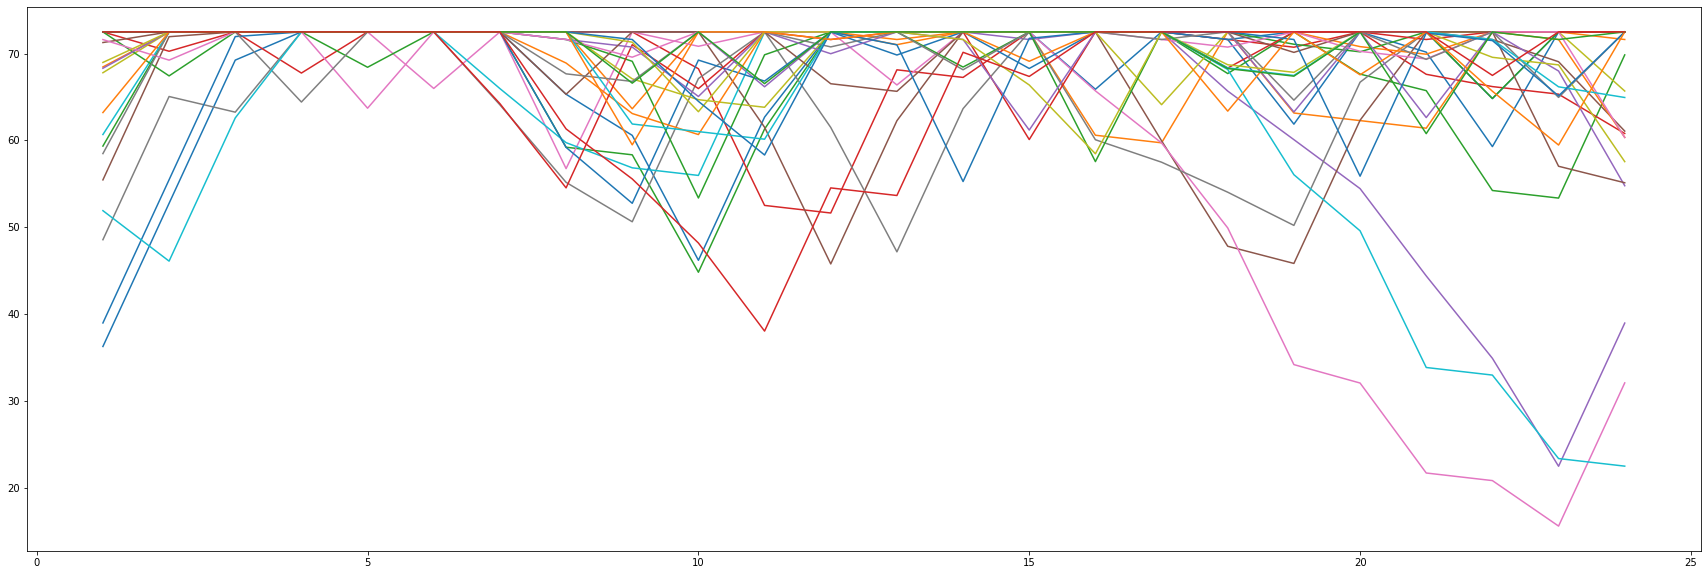

In [31]:
plt.figure(figsize=(30,10))

distances = []

for x in range(1,25):
  tmp = distance_df[ (distance_df["ev_id"] == 2) & (distance_df["days"] == x)][["time","soc"]]
  plt.plot(tmp["time"], tmp["soc"])



In [32]:
ev_1_df = distance_df

table = pd.pivot_table(ev_1_df, values=['soc'], 
                       index=['ev_id','model_id', 'days'], columns=['time'], aggfunc=np.sum)
table.head(24)

soc             ...                      
time                        1          2   ...         23         24
ev_id model_id days                        ...                      
0     1        1     36.250000  42.850000  ...  34.581172  41.181172
               2     40.321172  28.565875  ...  39.277827  30.629419
               3     29.769419  36.369419  ...  52.278069  49.788206
               4     56.000000  56.000000  ...  56.000000  56.000000
               5     56.000000  56.000000  ...  47.757412  54.357412
               6     56.000000  56.000000  ...  45.664629  44.804629
               7     42.708522  30.139552  ...  56.000000  56.000000
               8     55.140000  56.000000  ...  46.221787  35.628603
               9     30.493336  37.093336  ...  36.565957  26.289926
               10    32.889926  39.489926  ...  55.897423  56.000000
               11    56.000000  56.000000  ...  49.299293  55.899293
               12    54.519428  56.000000  ...  56.000000  56.000000
               13    46.093316  52.693316  ...  41.345184  25.865184
               14    32.465184  23.862163  ...  21.571379  28.171379
               15    34.771379  41.371379  ...  38.346012  44.946012
               16    51.546012  56.000000  ...  32.565596  39.165596
               17    38.305596  44.905596  ...  56.000000  56.000000
               18    56.000000  56.000000  ...  56.000000  56.000000
               19    56.000000  56.000000  ...  56.000000  56.000000
               20    56.000000  50.531580  ...  30.391967  27.124878
               21    33.724878  40.324878  ...  54.467161  56.000000
               22    55.140000  56.000000  ...  52.424351  56.000000
               23    56.000000  56.000000  ...  54.657902  47.198050
               24    53.798050  56.000000  ...  40.289744  39.429744

[24 rows x 24 columns]

## Looking the feature importance with XGB

### Distance Traveled


In [33]:
merged_inner[['ev_id', 'time', 'days', 'soc', 'connected_val', 'location_val','distance_traveled']][:10]

,ev_id,time,days,soc,connected_val,location_val,distance_traveled
0,0,1,1,36.250000,1,0,0.000000
1,0,2,1,42.850000,1,0,0.000000
2,0,3,1,49.450000,1,0,0.000000
3,0,4,1,56.000000,1,0,0.000000
4,0,5,1,56.000000,1,0,0.000000
5,0,6,1,56.000000,0,0,0.000000
6,0,7,1,47.480729,1,1,49.530643
7,0,8,1,54.080729,0,1,0.000000
8,0,9,1,49.061419,0,1,29.182039
9,0,10,1,48.201419,0,1,5.000000


In [36]:
X = merged_inner[['ev_id', 'model_id', 'time', 'soc', 'connected_val']]
y = []
for elem in merged_inner[["distance_traveled"]].values:
  y.append(elem[0])

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

dtrain = xgb.DMatrix(X_train,label = Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

#param_list = {'max_depth': 6, 'eta': 1, 'objective': 'binary:hinge'}
param_list = {'max_depth': 6, 'eta': 1}
param_list['nthread'] = 5
#param_list['eval_metric'] = 'auc'

n_rounds = 600

# if nothing seems to improve for 50 iterations - stop
early_stopping = 50

# train for training and test for ... validation!    
eval_list = [(dtrain, 'Train'), (dtest, 'Validation')]

# 1,2,3.. go!
bst = xgb.train(param_list, dtrain, n_rounds, evals=eval_list, early_stopping_rounds=early_stopping, verbose_eval=True)

#precision_score(Y_test, ypred, average='macro')

[0]	Train-rmse:16.7049	Validation-rmse:14.892
Multiple eval metrics have been passed: 'Validation-rmse' will be used for early stopping.

Will train until Validation-rmse hasn't improved in 50 rounds.
[1]	Train-rmse:16.514	Validation-rmse:14.9245
[2]	Train-rmse:16.3135	Validation-rmse:15.3747
[3]	Train-rmse:16.1391	Validation-rmse:15.3286
[4]	Train-rmse:15.9929	Validation-rmse:15.336
[5]	Train-rmse:15.8802	Validation-rmse:15.3807
[6]	Train-rmse:15.8047	Validation-rmse:15.4294
[7]	Train-rmse:15.6888	Validation-rmse:15.6946
[8]	Train-rmse:15.6051	Validation-rmse:15.7165
[9]	Train-rmse:15.4897	Validation-rmse:15.6778
[10]	Train-rmse:15.4111	Validation-rmse:15.7026
[11]	Train-rmse:15.386	Validation-rmse:15.7461
[12]	Train-rmse:15.2824	Validation-rmse:15.7612
[13]	Train-rmse:15.2291	Validation-rmse:15.8882
[14]	Train-rmse:15.0871	Validation-rmse:16.012
[15]	Train-rmse:15.0236	Validation-rmse:16.2818
[16]	Train-rmse:14.9649	Validation-rmse:16.2329
[17]	Train-rmse:14.9006	Validation-rmse:16.2

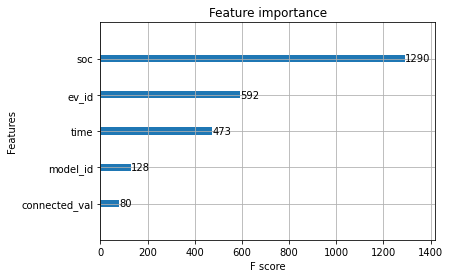

In [35]:
from sklearn.metrics import precision_score
ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)
xgb.plot_importance(bst)
#precision_score(Y_test, ypred, average='macro')




### SOC

In [39]:
X = merged_inner[['ev_id', 'model_id', 'days', 'time', 'connected_val', 'location_val']]
y = []
for elem in merged_inner[["soc"]].values:
  y.append(elem[0])

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

dtrain = xgb.DMatrix(X_train,label = Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

#param_list = {'max_depth': 6, 'eta': 1, 'objective': 'binary:hinge'}
param_list = {'max_depth': 6, 'eta': 1}
param_list['nthread'] = 5
#param_list['eval_metric'] = 'auc'

n_rounds = 600

# if nothing seems to improve for 50 iterations - stop
early_stopping = 50

# train for training and test for ... validation!    
eval_list = [(dtrain, 'Train'), (dtest, 'Validation')]

# 1,2,3.. go!
bst = xgb.train(param_list, dtrain, n_rounds, evals=eval_list, early_stopping_rounds=early_stopping, verbose_eval=True)

#precision_score(Y_test, ypred, average='macro')

[0]	Train-rmse:10.0188	Validation-rmse:8.6381
Multiple eval metrics have been passed: 'Validation-rmse' will be used for early stopping.

Will train until Validation-rmse hasn't improved in 50 rounds.
[1]	Train-rmse:9.9028	Validation-rmse:8.65237
[2]	Train-rmse:9.78163	Validation-rmse:8.71211
[3]	Train-rmse:9.61566	Validation-rmse:9.15072
[4]	Train-rmse:9.47753	Validation-rmse:9.13807
[5]	Train-rmse:9.37494	Validation-rmse:9.23038
[6]	Train-rmse:9.27166	Validation-rmse:9.31269
[7]	Train-rmse:9.12047	Validation-rmse:9.71012
[8]	Train-rmse:9.03626	Validation-rmse:9.80661
[9]	Train-rmse:8.94798	Validation-rmse:9.89244
[10]	Train-rmse:8.88837	Validation-rmse:9.99244
[11]	Train-rmse:8.84439	Validation-rmse:10.1034
[12]	Train-rmse:8.79104	Validation-rmse:10.0887
[13]	Train-rmse:8.74421	Validation-rmse:10.136
[14]	Train-rmse:8.68699	Validation-rmse:10.368
[15]	Train-rmse:8.62662	Validation-rmse:10.3447
[16]	Train-rmse:8.56985	Validation-rmse:10.3884
[17]	Train-rmse:8.54009	Validation-rmse:10.

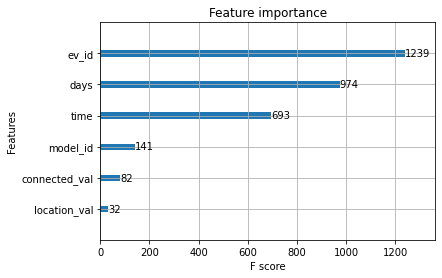

In [40]:
from sklearn.metrics import precision_score
ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)
xgb.plot_importance(bst)
#precision_score(Y_test, ypred, average='macro')


We decided only use the ev_id, time, model_id, and connected_val for predicting the SOC

# Predicting for SOC using LSTM (RNN)

In [45]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing

sc = preprocessing.MinMaxScaler()



In [46]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [47]:
train_work_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ev_id,54000.0,49.500000,28.866337,0.000,24.750000,49.500000,74.250000,99.000000
model_id,54000.0,1.530000,1.144170,0.000,0.750000,1.500000,3.000000,3.000000
days,54000.0,11.755556,6.498455,1.000,6.000000,12.000000,17.000000,23.000000
time,54000.0,12.366667,6.920966,1.000,6.000000,12.000000,18.000000,24.000000
soc,54000.0,46.968750,16.002520,0.000,39.291237,45.000000,56.000000,72.500000
loc_id,54000.0,36.230000,26.345587,0.000,15.000000,31.000000,49.250000,99.000000
soc_diff_charged,54000.0,1.975312,3.969333,0.000,0.000000,0.000000,1.621739,25.225367
soc_diff_used,54000.0,-1.978637,3.653256,-36.250,-2.298955,0.000000,0.000000,0.000000
location_val,54000.0,0.500000,0.500005,0.000,0.000000,0.500000,1.000000,1.000000
battery_size,54000.0,53.745000,12.097941,41.000,45.000000,50.500000,60.125000,72.500000


In [48]:
train_df = train_work_df[["ev_id", "model_id", "time", "connected_val", "soc"]]
val_df = val_work_df[["ev_id", "model_id", "time", "connected_val", "soc"]]
df = pd.concat([train_df,val_df])

In [49]:
column_indices = {name: i for i, name in enumerate(train_df.columns)}
num_features = train_df.shape[1]

print(column_indices, " ", num_features)
print(train_df.shape)
print(val_df.shape)

{'ev_id': 0, 'model_id': 1, 'time': 2, 'connected_val': 3, 'soc': 4}   5
(54000, 5)
(18000, 5)


In [50]:
train_work_df[train_work_df["distance_traveled"] > 1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ev_id,19162.0,49.689333,29.009882,0.000000,24.000000,50.000000,75.000000,99.000000
model_id,19162.0,1.534704,1.148978,0.000000,0.000000,2.000000,3.000000,3.000000
days,19162.0,11.681088,6.498201,1.000000,6.000000,12.000000,17.000000,23.000000
time,19162.0,12.622012,6.618565,1.000000,8.000000,12.000000,18.000000,24.000000
soc,19162.0,39.989025,16.254664,0.000000,29.932162,38.594078,50.962170,71.625000
loc_id,19162.0,35.171172,26.320755,0.000000,14.000000,30.000000,48.000000,99.000000
soc_diff_charged,19162.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
soc_diff_used,19162.0,-5.575933,4.189607,-36.250000,-8.416610,-4.991785,-1.637319,-0.169879
location_val,19162.0,0.559284,0.496486,0.000000,0.000000,1.000000,1.000000,1.000000
battery_size,19162.0,53.772988,12.087262,41.000000,45.000000,45.000000,72.500000,72.500000


In [51]:
# # Normalization
# train_mean = train_df[train_df["soc"] >= 0].mean()
# train_std = train_df[train_df["soc"] >= 0].std()

# train_df["soc"] = (train_df["soc"] - train_mean["soc"]) / train_std["soc"]
# val_df["soc"] = (val_df["soc"] - train_mean["soc"]) / train_std["soc"]
# df["soc"] = (df["soc"] - train_mean["soc"]) / train_std["soc"]

# # train_df = sc.fit_transform(train_df)
# # val_df = sc.fit_transform(val_df)

In [52]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [53]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]

  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [55]:
def plot(self, model=None, plot_col='soc', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [57]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [58]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def user_input(self, new_df):
  return self.make_dataset(self, new_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.example = example
WindowGenerator.user_input = user_input

In [59]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['soc'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['soc']

In [60]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 5)
Labels shape (batch, time, features): (32, 1, 1)


## Baseline

In [61]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [62]:
baseline = Baseline(label_index=column_indices['soc'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError(), tf.metrics.Accuracy()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.val, verbose=0)

563/563 [==============================] - 2s 3ms/step - loss: 38.2233 - mean_absolute_error: 3.9719 - accuracy: 0.3728


In [63]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['soc'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['soc']

In [65]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 5)
Output shape: (32, 24, 1)


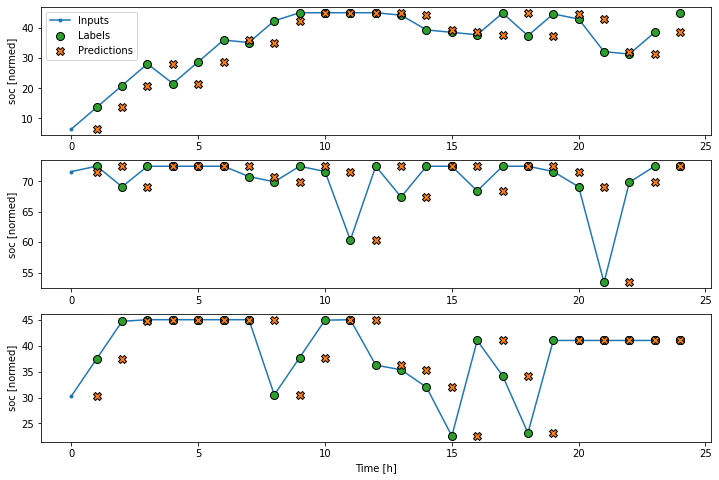

In [66]:
wide_window.plot(baseline)

## Linear

In [67]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [68]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 5)
Output shape: (32, 1, 1)


In [69]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])
  
  ## normalize
  #normalized_train = sc.fit_transform(window.train)

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [70]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.val, verbose=0)

Epoch 1/20
1688/1688 [==============================] - 7s 4ms/step - loss: 194.7430 - mean_absolute_error: 10.4626 - val_loss: 43.6112 - val_mean_absolute_error: 5.0046
Epoch 2/20
1688/1688 [==============================] - 7s 4ms/step - loss: 33.3952 - mean_absolute_error: 4.0181 - val_loss: 31.1348 - val_mean_absolute_error: 3.6671
Epoch 3/20
1688/1688 [==============================] - 7s 4ms/step - loss: 27.4176 - mean_absolute_error: 3.4897 - val_loss: 26.8679 - val_mean_absolute_error: 3.4372
Epoch 4/20
1688/1688 [==============================] - 8s 4ms/step - loss: 23.5142 - mean_absolute_error: 3.2605 - val_loss: 23.4340 - val_mean_absolute_error: 3.2705
Epoch 5/20
1688/1688 [==============================] - 7s 4ms/step - loss: 20.5486 - mean_absolute_error: 3.1209 - val_loss: 20.9352 - val_mean_absolute_error: 3.1584
Epoch 6/20
1688/1688 [==============================] - 7s 4ms/step - loss: 18.4963 - mean_absolute_error: 3.0523 - val_loss: 19.3751 - val_mean_absolute_erro

In [71]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 5)
Output shape: (32, 24, 1)


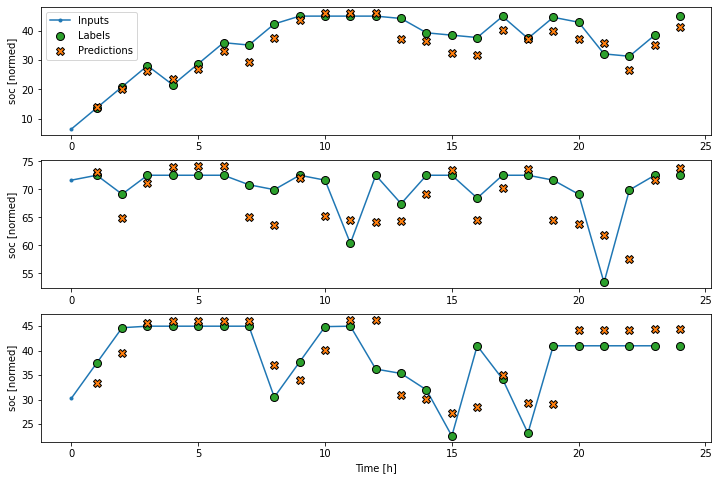

In [72]:
wide_window.plot(linear)

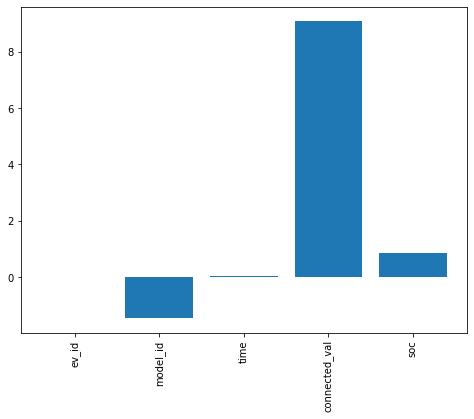

In [73]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

## LSTM (RNN)

In [74]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(45, return_sequences=True),
    tf.keras.layers.LSTM(45, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [75]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 5)
Output shape: (32, 24, 1)


In [76]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.val, verbose=0)

562/562 [==============================] - 3s 5ms/step - loss: 8.5553 - mean_absolute_error: 1.4634


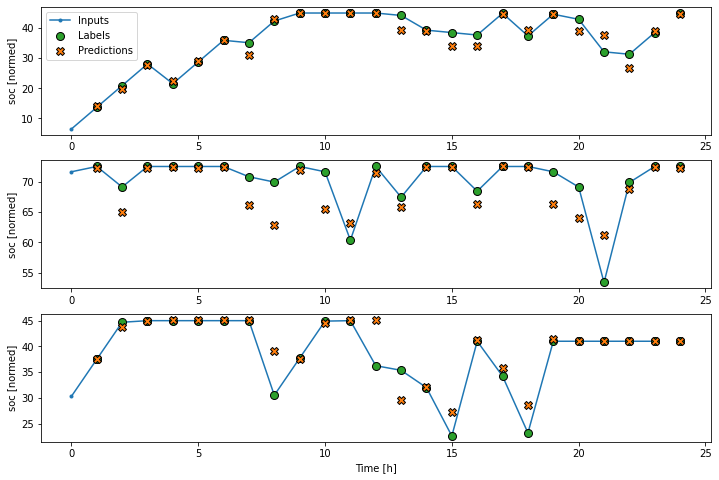

In [79]:
wide_window.plot(lstm_model)

# Change the model to JSON


In [80]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os

# serialize model to JSON
model_json = lstm_model.to_json()
with open("lstm_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
lstm_model.save_weights("lstm_model.h5")
print("Saved model to disk")

Saved model to disk


# End Change model to JSON

# Load Model from JSON


In [81]:
# load json and create model
json_file = open('lstm_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("lstm_model.h5")
print("Loaded model from disk")

Loaded model from disk


# End Load Model from JSON


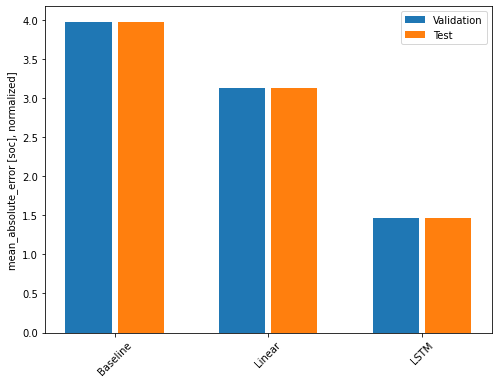

In [82]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [soc], normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [83]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 3.9719
Linear      : 3.1305
LSTM        : 1.4634


# Multi Window

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

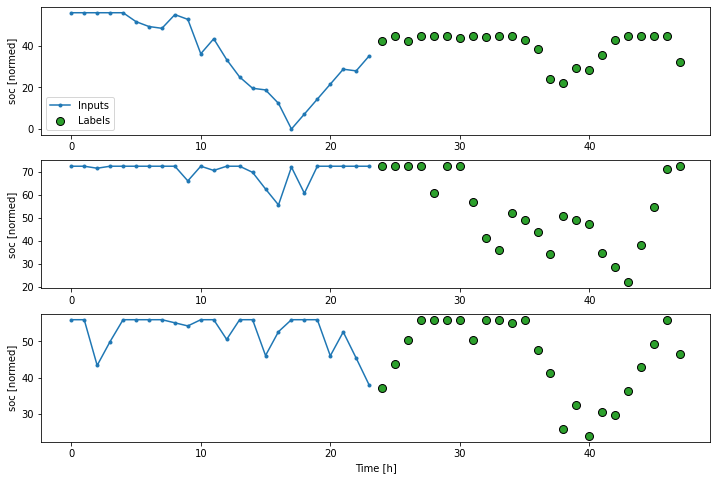

In [84]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

## Baseline

562/562 [==============================] - 2s 3ms/step - loss: 56.2442 - mean_absolute_error: 3.5109


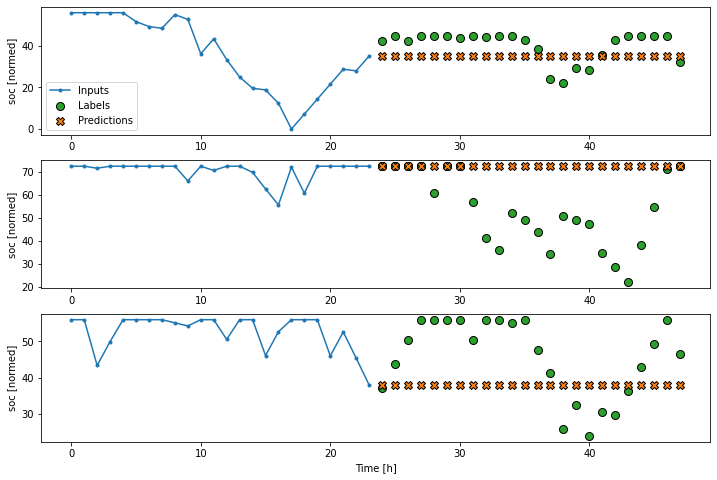

In [85]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.val, verbose=0)
multi_window.plot(last_baseline)

562/562 [==============================] - 1s 3ms/step - loss: 38.7899 - mean_absolute_error: 2.1300


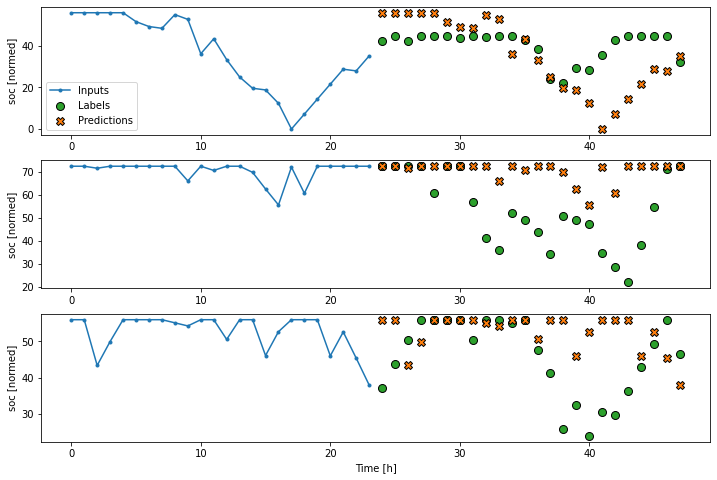

In [86]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val, verbose=0)
multi_window.plot(repeat_baseline)

## LSTM

In [87]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()



562/562 [==============================] - 2s 4ms/step - loss: 25.3648 - mean_absolute_error: 2.3574


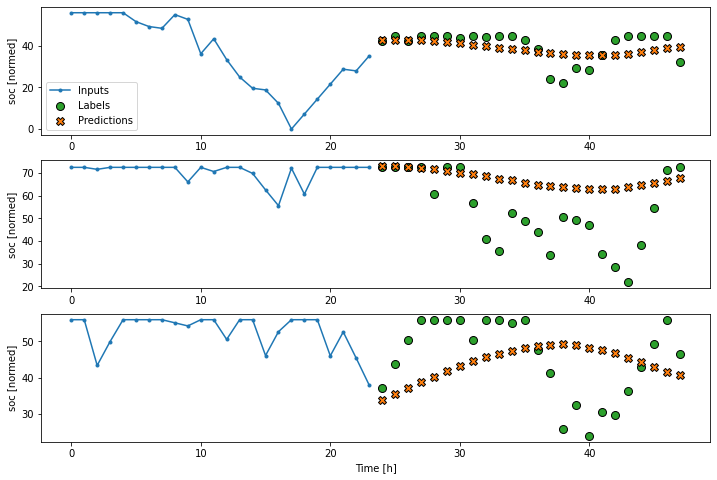

In [88]:
multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val, verbose=0)
multi_window.plot(multi_lstm_model)